In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import pickle

In [2]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri

In [3]:
A_store = pickle.load(open('../predictions/case-2-graph_Austin_True_all_As.pkl','r'))

In [4]:
lr = 0.5
num_season = 2
num_home = 3
lam = 0
iters = 1300

In [5]:
A = A_store[lr][num_season][num_home][lam][iters]

In [6]:
App_factor = {}
for i in range(6):
    App_factor[i+1] = np.zeros((6,1))
for m in range(3):
    for n in range(2):
        for j in range(1,7):
            App_factor[m*2+n+1][j-1] = A[j][m][n]

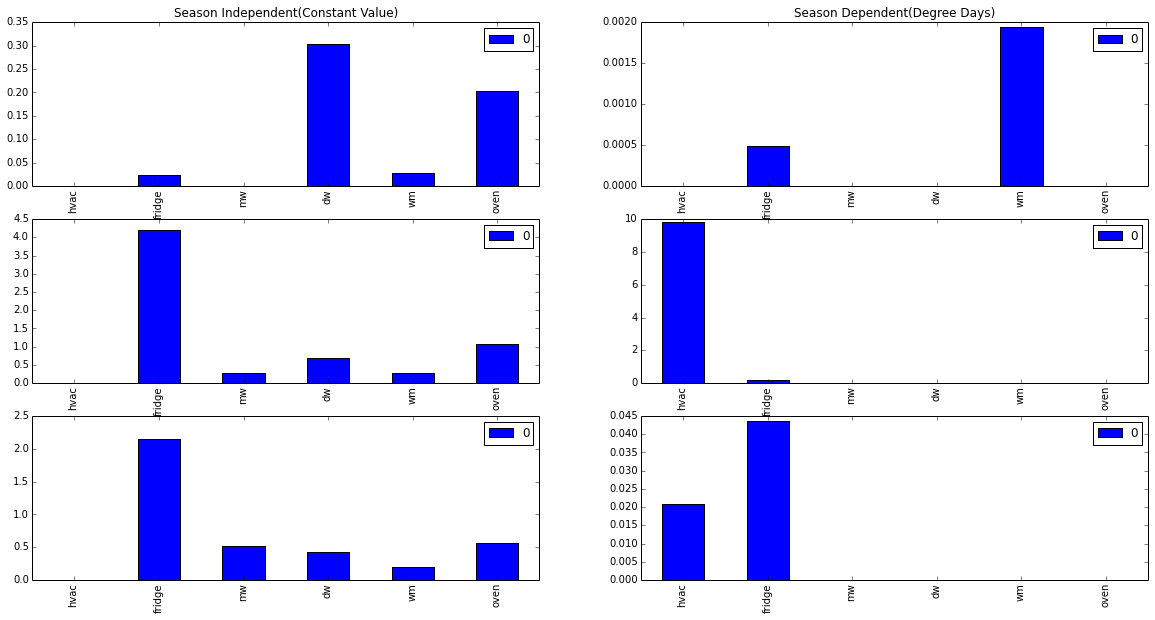

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
ax = axes.flatten()
count = 0

for idx in range(1,7):
    app = App_factor[idx].copy()
    df = pd.DataFrame(app)
    df = df.rename(index={0:"hvac", 1:"fridge", 2:"mw", 3:"dw", 4:"wm", 5:"oven"})
#     df = df.rename(columns={0: "Austin", 1:"SanDiego"})
    df.plot(ax=ax[count], kind="bar")
    if count == 0:
        ax[count].set_title('Season Independent(Constant Value)')
    if count == 1:
        ax[count].set_title('Season Dependent(Degree Days)')

    count +=1


In [21]:
App_factor

{1: array([[  1.00000000e-08,   1.00000000e-08],
        [  2.37264631e-02,   2.37264631e-02],
        [  1.00000000e-08,   1.00000000e-08],
        [  3.03933266e-01,   3.03933266e-01],
        [  2.79868091e-02,   2.79868091e-02],
        [  2.03883257e-01,   2.03883257e-01]]),
 2: array([[  1.00000000e-08,   1.00000000e-08],
        [  4.88974260e-04,   4.88974260e-04],
        [  1.00000000e-08,   1.00000000e-08],
        [  1.00000000e-08,   1.00000000e-08],
        [  1.93674047e-03,   1.93674047e-03],
        [  1.00000000e-08,   1.00000000e-08]]),
 3: array([[  1.00000000e-08,   1.00000000e-08],
        [  4.19435108e+00,   4.19435108e+00],
        [  2.91519012e-01,   2.91519012e-01],
        [  6.78437584e-01,   6.78437584e-01],
        [  2.75418644e-01,   2.75418644e-01],
        [  1.06506432e+00,   1.06506432e+00]]),
 4: array([[  9.81404020e+00,   9.81404020e+00],
        [  2.17879732e-01,   2.17879732e-01],
        [  1.00000000e-08,   1.00000000e-08],
        [  1.000